In [26]:
from google.colab import files
uploaded = files.upload()


Saving social_media_vs_productivity.csv to social_media_vs_productivity (3).csv


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Baca file
df = pd.read_csv("social_media_vs_productivity.csv")

# Tampilkan kolom
print("Kolom-kolom tersedia:", df.columns.tolist())


Kolom-kolom tersedia: ['age', 'gender', 'job_type', 'daily_social_media_time', 'social_platform_preference', 'number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps', 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score']


In [29]:
# Gunakan skor produktivitas aktual sebagai target
target_col = 'actual_productivity_score'

# Drop data kosong (jika ada)
df.dropna(inplace=True)

# Pisahkan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]

# Jika target berupa angka dan kamu ingin klasifikasi, ubah jadi kategori:
# y = pd.cut(y, bins=[0, 3, 7, 10], labels=["Rendah", "Sedang", "Tinggi"])


In [30]:
# Encoding kategori
X_encoded = pd.get_dummies(X)

# Seleksi fitur terbaik
top_k = 5
selector = SelectKBest(score_func=f_classif, k=top_k)
X_top = selector.fit_transform(X_encoded, y)

selected_features = X_encoded.columns[selector.get_support()]
print("\nFitur Terpilih (Top 5):", list(selected_features))



Fitur Terpilih (Top 5): ['social_platform_preference_Facebook', 'social_platform_preference_Instagram', 'social_platform_preference_Telegram', 'social_platform_preference_TikTok', 'social_platform_preference_Twitter']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Model regresi SVM
model = SVR(kernel='rbf')  # 'rbf' biasanya lebih fleksibel dari 'linear'
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")



Mean Squared Error (MSE): 3.6653
R-squared (R2 Score): -0.0014


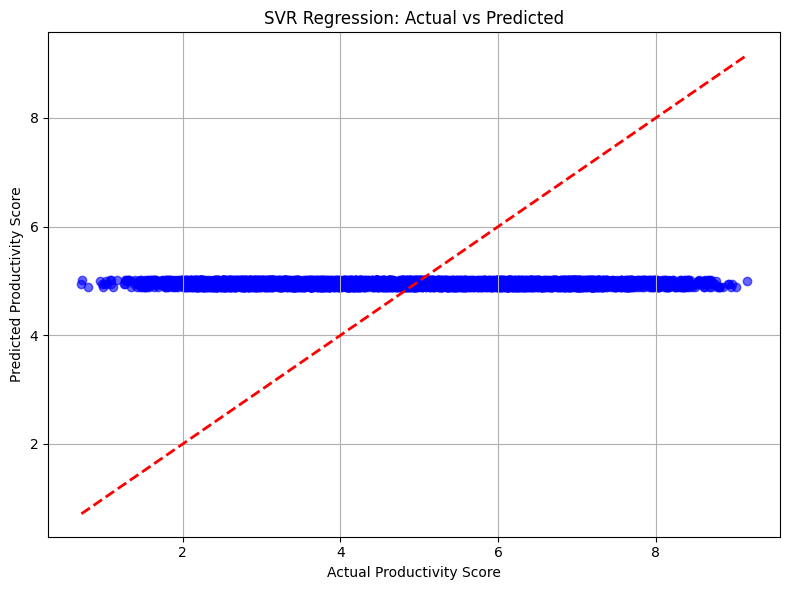

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Buat scatter plot: nilai aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # garis ideal
plt.xlabel("Actual Productivity Score")
plt.ylabel("Predicted Productivity Score")
plt.title("SVR Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()
